In [1]:
import requests
from bs4 import BeautifulSoup as bs

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = "https://www.tirabeauty.com/products/?q=biotique"
r = requests.get(url)
print(r)

<Response [200]>


In [4]:
soup = bs(r.content, "lxml")
print(soup)

<!DOCTYPE html>
<html data-vue-meta="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D,%22style%22:%7B%22ssr%22:%22--primaryColor:#030303;--secondaryColor:#511778;%20--accentColor:#01010e;--linkColor:#f00000;--bgColor:#ffffff;--pageBackground:#ffffff;--themeAccent:#01010e;--textHeading:#511778;--textBody:#3C3131;--textLabel:#7D7676;--textSecondary:#9C9C9C;--buttonPrimary:#030303;--buttonSecondary:#000000;--buttonLink:#f00000;--saleBadgeBackground:#FFFFFF;--saleBadgeText:#1C958F;--saleDiscountText:#1C958F;--saleTimer:#994449;--headerBackground:#F3F3ED;--headerNav:#261A1A;--headerIcon:#261A1A;--footerBackground:#2C231E;--footerBottomBackground:#231812;--footerHeadingText:#FFFFFF;--footerBodyText:#FFFFFF;--footerIcon:#FFFFFF;--dialogBackground:#FFFFFF;--overlay:#14130E;--dividerStokes:#D4D1D1;--highlightColor:#EDECE9;--successBackground:#C2DBC9;--successText:#1C958F;--errorBackground:#E6D5D5;--errorText:#B24141;--informationBackground:#EBD3BC;--informationText:#D28F51;%22%7D%7D" lang="en" style="--p

In [5]:
content = r.text
len(content)

2220747

In [6]:
doc = bs(content, "html.parser")

In [7]:
products = soup.find_all("div", class_="product-name")
discounts = soup.find_all("p", class_="discount-price")

product_data = []
for product, discount in zip(products, discounts):
    name = product.text.strip()
    discount_price = discount.text.strip()
    product_data.append({"Name": name, "DiscountPrice": discount_price})

df = pd.DataFrame(product_data)

df.to_csv("biotique_products_tira.csv", index=False)
print("Product data extracted:")

Product data extracted:


In [8]:
url2 = "https://www.purplle.com/search?q=biotique"
r2 = requests.get(url2)
print(r2)

<Response [200]>


In [9]:
soup2 = bs(r2.content, "lxml")
print(soup2)

<!DOCTYPE html>
<html lang="en"><head>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="no-cache" http-equiv="Cache-Control"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="!" name="fragment"/>
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="#673ab7" name="theme-color"/>
<link href="/purplle.webmanifest" rel="manifest"/>
<link href="https://www.media4.ppl-media.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://media6.ppl-media.com" rel="preconnect"/>
<link crossorigin="" href="https://static.criteo.net" rel="preconnect"/>
<link crossorigin="" href="https://www.google.co.in" rel="preconnect"/>
<link crossorigin="" href="https://cdn.branch.io" rel="preconnect"/>
<link crossorigin="" href="https://www.googletagmanager.com" rel="preco

In [10]:
doc2 = bs(content, "html.parser")

In [11]:
products2 = soup.find_all(
    "div", class_="mb-2 fs-7 text-start text-black lh-base truncate-2-lines"
)
discounts2 = soup.find_all("span", class_="text-black fw-bolder fs-6 f18i")

product_data2 = []
for product, discount in zip(products, discounts):
    name = product.text.strip()
    discount_price = discount.text.strip()
    product_data.append({"Name": name, "DiscountPrice": discount_price})

df = pd.DataFrame(product_data2)

df.to_csv("biotique_products_purple.csv", index=False)
print("Product data extracted:")

Product data extracted:


In [12]:
import pandas as pd


df1 = pd.read_csv("biotique_products_tira.csv")
df2 = pd.read_csv("biotique_products_purple.csv")


df1.columns = df1.columns.str.strip().str.lower().str.replace(" ", "_")
df2.columns = df2.columns.str.strip().str.lower().str.replace(" ", "_")


df1["originalprice"] = df1["originalprice"].str.replace("₹", "", regex=False)
df1["offerprice"] = df1["offerprice"].str.replace("₹", "", regex=False)
df1["discount"] = df1["discount"].str.replace("%", "", regex=False)

df2["originalprice"] = df2["originalprice"].str.replace("₹", "", regex=False)
df2["offerprice"] = df2["offerprice"].str.replace("₹", "", regex=False)
df2["discount"] = df2["discount"].str.replace("%", "", regex=False)


df1["originalprice"] = pd.to_numeric(df1["originalprice"], errors="coerce")
df1["offerprice"] = pd.to_numeric(df1["offerprice"], errors="coerce")
df1["discount"] = pd.to_numeric(df1["discount"], errors="coerce")

df2["originalprice"] = pd.to_numeric(df2["originalprice"], errors="coerce")
df2["offerprice"] = pd.to_numeric(df2["offerprice"], errors="coerce")
df2["discount"] = pd.to_numeric(df2["discount"], errors="coerce")


df_merged = pd.merge(df1, df2, on="productname", suffixes=("_site1", "_site2"))

Performing EDA 

In [14]:
import matplotlib.pyplot as plt


df_merged["avg_price_site1"] = (
    df_merged["originalprice_site1"] + df_merged["offerprice_site1"]
) / 2
df_merged["avg_price_site2"] = (
    df_merged["originalprice_site2"] + df_merged["offerprice_site2"]
) / 2

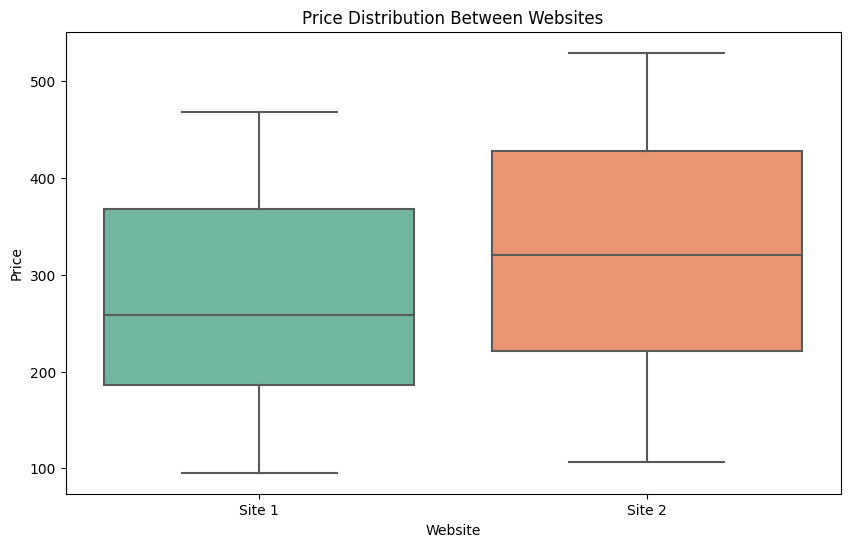

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged[["avg_price_site1", "avg_price_site2"]], palette="Set2")
plt.title("Price Distribution Between Websites")
plt.xlabel("Website")
plt.ylabel("Price")
plt.xticks([0, 1], ["Site 1", "Site 2"])
plt.show()

In [16]:
desc_df1 = df1.describe()
desc_df2 = df2.describe()

print("Dataset 1 - Descriptive Statistics:\n", desc_df1)
print("\nDataset 2 - Descriptive Statistics:\n", desc_df2)

Dataset 1 - Descriptive Statistics:
        originalprice  offerprice    discount
count     150.000000  150.000000  150.000000
mean      301.360000  247.673333   17.733333
std       116.931993   97.494209    5.663573
min       107.000000   82.000000   10.000000
25%       207.250000  167.000000   10.000000
50%       287.500000  238.000000   20.000000
75%       398.000000  331.750000   23.750000
max       497.000000  444.000000   25.000000

Dataset 2 - Descriptive Statistics:
        originalprice  offerprice    discount
count     150.000000  150.000000  150.000000
mean      343.400000  287.046667   16.733333
std       126.786509  113.836651    9.322461
min       123.000000   88.000000    5.000000
25%       233.750000  199.250000   10.000000
50%       341.000000  272.500000   20.000000
75%       451.750000  376.250000   20.000000
max       549.000000  516.000000   30.000000


C:\Users\Riya\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Riya\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


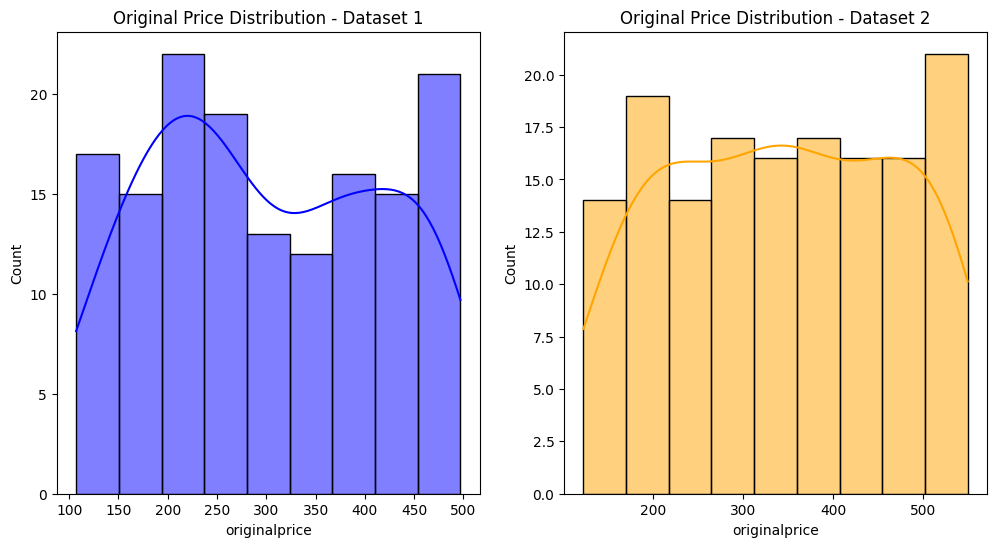

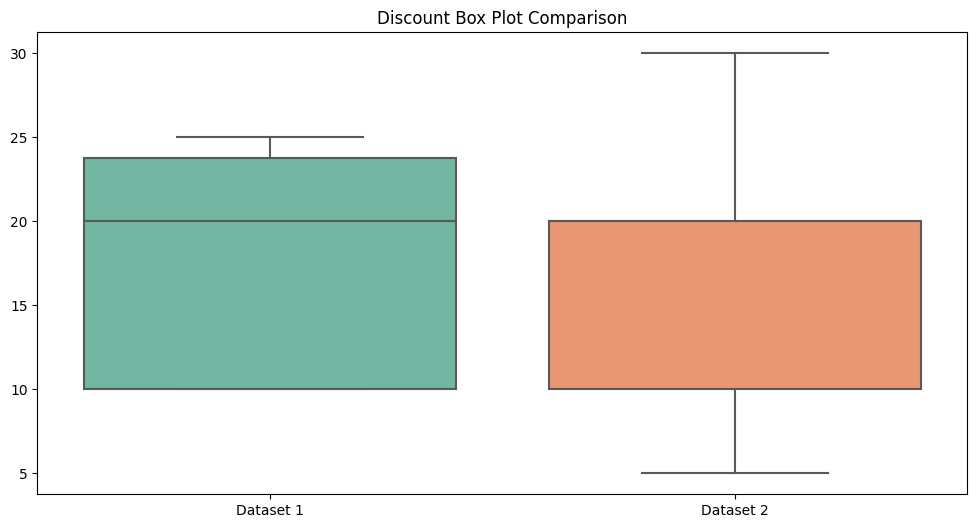

C:\Users\Riya\AppData\Local\Temp\ipykernel_12248\288508606.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1["originalprice"], shade=True, color="blue", label="Dataset 1")
C:\Users\Riya\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Riya\AppData\Local\Temp\ipykernel_12248\288508606.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2["originalprice"], shade=True, color="orange", label="Dataset 2")
C:\Users\Riya\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

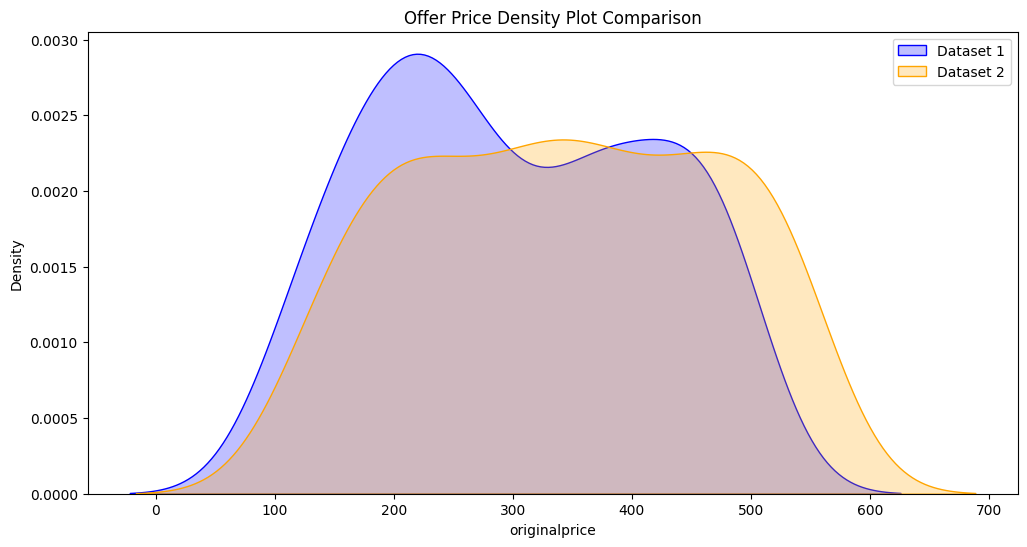

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1["originalprice"], kde=True, color="blue", label="Dataset 1")
plt.title("Original Price Distribution - Dataset 1")
plt.subplot(1, 2, 2)
sns.histplot(df2["originalprice"], kde=True, color="orange", label="Dataset 2")
plt.title("Original Price Distribution - Dataset 2")
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=[df1["discount"], df2["discount"]], palette="Set2")
plt.xticks([0, 1], ["Dataset 1", "Dataset 2"])
plt.title("Discount Box Plot Comparison")
plt.show()


plt.figure(figsize=(12, 6))
sns.kdeplot(df1["originalprice"], shade=True, color="blue", label="Dataset 1")
sns.kdeplot(df2["originalprice"], shade=True, color="orange", label="Dataset 2")
plt.title("Offer Price Density Plot Comparison")
plt.legend()
plt.show()

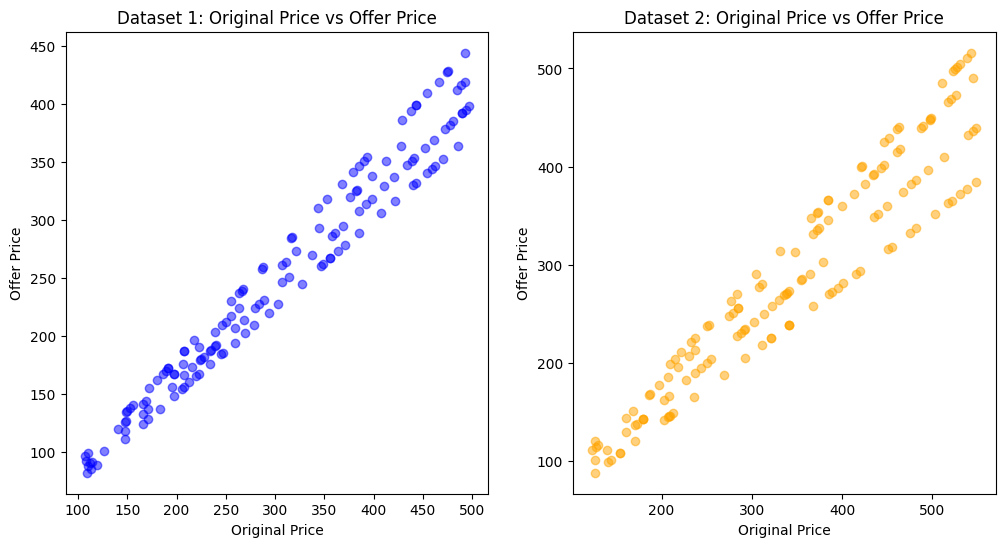

C:\Users\Riya\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Riya\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


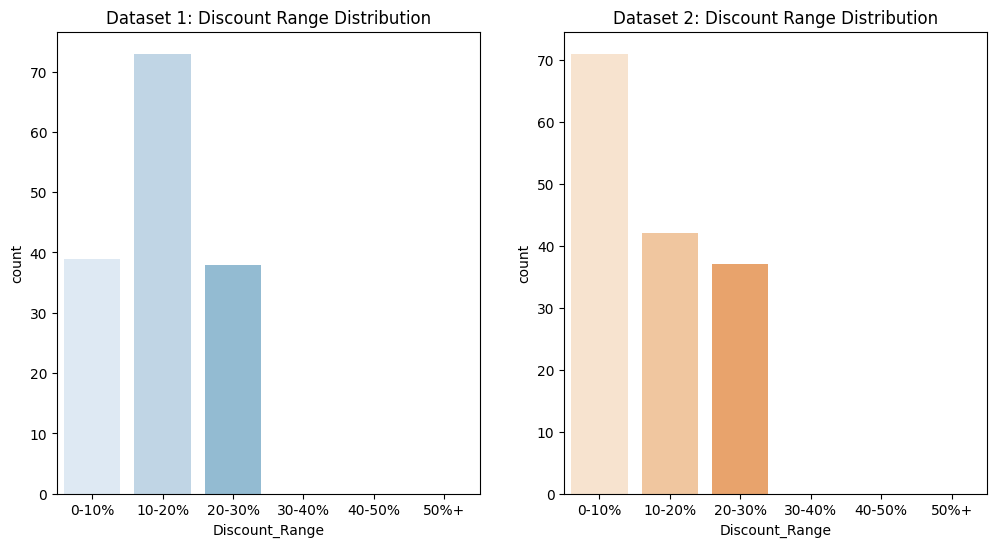

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df1["originalprice"], df1["offerprice"], color="blue", alpha=0.5)
plt.title("Dataset 1: Original Price vs Offer Price")
plt.xlabel("Original Price")
plt.ylabel("Offer Price")

plt.subplot(1, 2, 2)
plt.scatter(df2["originalprice"], df2["offerprice"], color="orange", alpha=0.5)
plt.title("Dataset 2: Original Price vs Offer Price")
plt.xlabel("Original Price")
plt.ylabel("Offer Price")
plt.show()


df1["Discount_Range"] = pd.cut(
    df1["discount"],
    bins=[0, 10, 20, 30, 40, 50, 100],
    labels=["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50%+"],
)
df2["Discount_Range"] = pd.cut(
    df2["discount"],
    bins=[0, 10, 20, 30, 40, 50, 100],
    labels=["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50%+"],
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="Discount_Range", data=df1, palette="Blues")
plt.title("Dataset 1: Discount Range Distribution")

plt.subplot(1, 2, 2)
sns.countplot(x="Discount_Range", data=df2, palette="Oranges")
plt.title("Dataset 2: Discount Range Distribution")
plt.show()

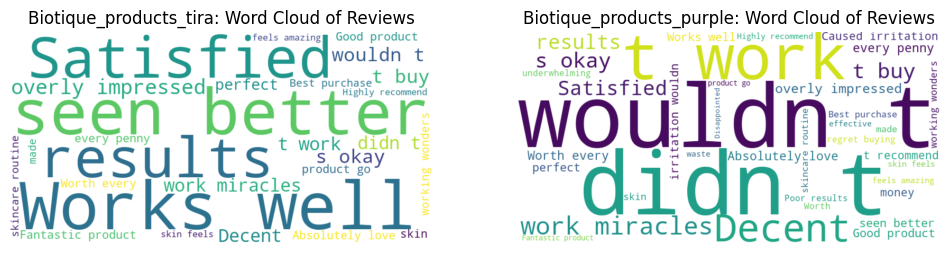

C:\Users\Riya\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Riya\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


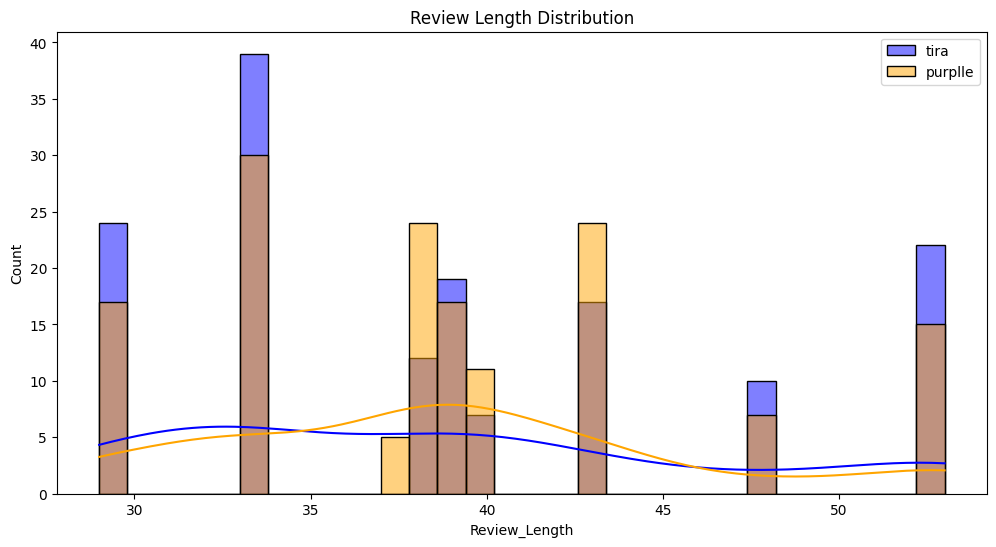

In [22]:
from wordcloud import WordCloud


plt.figure(figsize=(12, 6))
wordcloud1 = WordCloud(width=800, height=400, background_color="white").generate(
    " ".join(df1["reviews"])
)
plt.subplot(1, 2, 1)
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.title("Biotique_products_tira: Word Cloud of Reviews")

wordcloud2 = WordCloud(width=800, height=400, background_color="white").generate(
    " ".join(df2["reviews"])
)
plt.subplot(1, 2, 2)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.title("Biotique_products_purple: Word Cloud of Reviews")
plt.show()

df1["Review_Length"] = df1["reviews"].apply(len)
df2["Review_Length"] = df2["reviews"].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df1["Review_Length"], color="blue", kde=True, label="tira", bins=30)
sns.histplot(df2["Review_Length"], color="orange", kde=True, label="purplle", bins=30)
plt.title("Review Length Distribution")
plt.legend()
plt.show()

Tira: 20 unique products
Purplle: 20 unique products


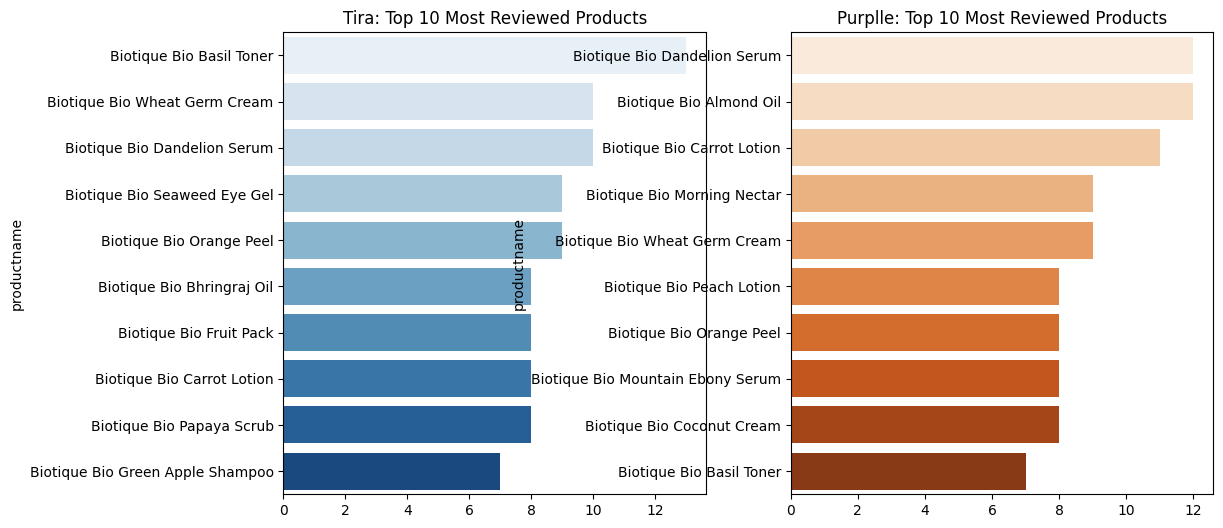

In [23]:
unique_products_df1 = df1["productname"].nunique()
unique_products_df2 = df2["productname"].nunique()

print(f"Tira: {unique_products_df1} unique products")
print(f"Purplle: {unique_products_df2} unique products")

top_products_df1 = df1["productname"].value_counts().head(10)
top_products_df2 = df2["productname"].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(y=top_products_df1.index, x=top_products_df1.values, palette="Blues")
plt.title("Tira: Top 10 Most Reviewed Products")

plt.subplot(1, 2, 2)
sns.barplot(y=top_products_df2.index, x=top_products_df2.values, palette="Oranges")
plt.title("Purplle: Top 10 Most Reviewed Products")
plt.show()

Algorithm implementation On Tira beatuy dataset

Performing Linear Regression for predicting price

Mean Squared Error: 196.1945039898075
R2 Score: 0.9766187817709278


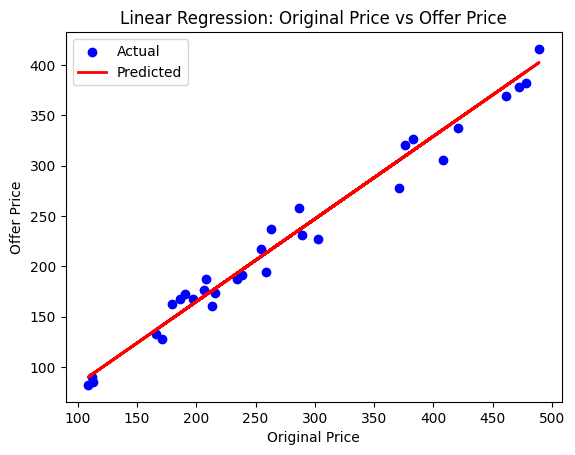

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df1[["originalprice"]]
y = df1["offerprice"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted")
plt.xlabel("Original Price")
plt.ylabel("Offer Price")
plt.title("Linear Regression: Original Price vs Offer Price")
plt.legend()
plt.show()

Random Forest Regression For Price Prediction
predicting offer price with multiple feature original price and discount


Random Forest Mean Squared Error: 48.73016999999998
Random Forest R2 Score: 0.9941926470113098


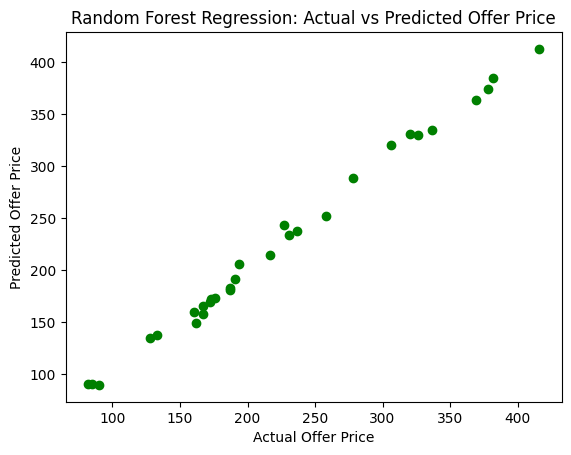

In [28]:
from sklearn.ensemble import RandomForestRegressor

X = df1[["originalprice", "discount"]]
y = df1["offerprice"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R2 Score: {r2_rf}")


plt.scatter(y_test, y_pred_rf, color="green")
plt.xlabel("Actual Offer Price")
plt.ylabel("Predicted Offer Price")
plt.title("Random Forest Regression: Actual vs Predicted Offer Price")
plt.show()

K-Mean clustering for grouping products based on discount range 

In [36]:
print(df1)

                           productname  originalprice  offerprice  discount  \
0     Biotique Bio Green Apple Shampoo            223         190        15   
1              Biotique Bio Almond Oil            166         124        25   
2               Biotique Bio Honey Gel            476         428        10   
3         Biotique Bio Seaweed Eye Gel            197         167        15   
4             Biotique Bio Orange Peel            497         398        20   
..                                 ...            ...         ...       ...   
145           Biotique Bio Basil Toner            489         416        15   
146             Biotique Bio Honey Gel            206         154        25   
147  Biotique Bio Mountain Ebony Serum            321         273        15   
148      Biotique Bio Wheat Germ Cream            148         118        20   
149        Biotique Bio Morning Nectar            235         188        20   

                                               revi

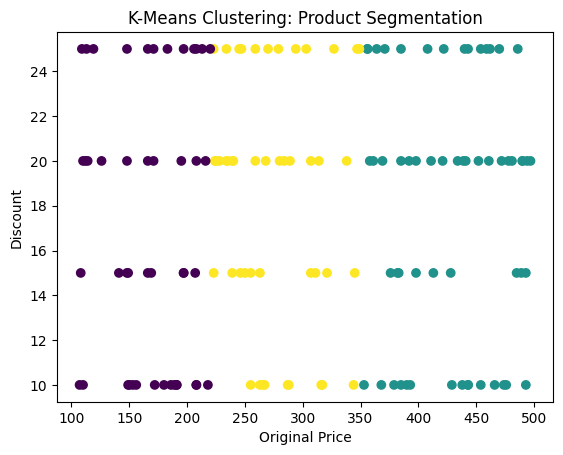

In [37]:
from sklearn.cluster import KMeans


X_cluster = df1[["originalprice", "discount"]]

kmeans = KMeans(n_clusters=3, random_state=42)
df1["Cluster"] = kmeans.fit_predict(X_cluster)


plt.scatter(df1["originalprice"], df1["discount"], c=df1["Cluster"], cmap="viridis")
plt.xlabel("Original Price")
plt.ylabel("Discount")
plt.title("K-Means Clustering: Product Segmentation")
plt.show()

In [38]:
centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
print(centroids)

Cluster Centroids:
[[166.7173913   17.06521739]
 [428.12068966  17.84482759]
 [276.17391304  18.26086957]]


In [39]:
cluster_summary = df1.groupby("Cluster")[["originalprice", "discount"]].mean()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
         originalprice   discount
Cluster                          
0           166.717391  17.065217
1           428.120690  17.844828
2           276.173913  18.260870


In [40]:
cluster_counts = df1["Cluster"].value_counts()
print("Number of Data Points in Each Cluster:")
print(cluster_counts)

Number of Data Points in Each Cluster:
Cluster
1    58
2    46
0    46
Name: count, dtype: int64


Support Vector Machines (SVM) for Classification Objective to Classify the sentiment of the Reviews

In [58]:

import pandas as pd
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity
df1["Sentiment"] = df1["reviews"].apply(get_sentiment)
df1.to_csv("labeled_dataset.csv", index=False)

In [47]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


data = pd.read_csv("labeled_dataset.csv")


print(data["Sentiment"].unique())



def categorize_sentiment(value):
    if value <= 0.4:
        return "negative"
    elif value <= 0.6:
        return "neutral"
    else:
        return "positive"

data["Sentiment"] = data["Sentiment"].apply(categorize_sentiment)


X = data["reviews"]
y = data["Sentiment"]  


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

[0.5        0.75       0.         0.4625     0.16666667 1.
 0.1        0.455     ]
Accuracy: 1.0
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         5
     neutral       1.00      1.00      1.00        16
    positive       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



since the accuracy is 1 , so drawning of the curve is not usefull 

Naive bayes algorithm for text sentiment analysis

Accuracy: 1.0
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         5
     neutral       1.00      1.00      1.00        16
    positive       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



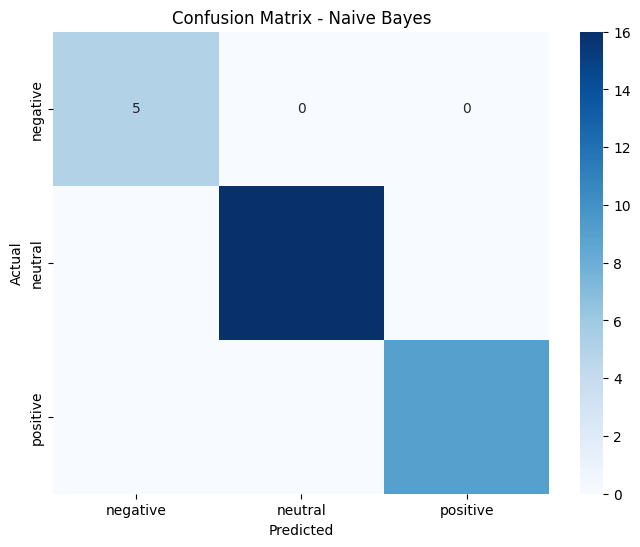

In [49]:
from sklearn.naive_bayes import MultinomialNB


X = data["reviews"]
y = data["Sentiment"]


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


y_pred = nb_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred, labels=nb_model.classes_)


plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=nb_model.classes_,
    yticklabels=nb_model.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

Accuracy is 1 , which mean that the model correctly classified the instances in the test set.

Performance Comparison of Implemented Algorithms
Linear Regression for Price Prediction

Metrics:
Error: 196.19 (MSE)
R² Score: 0.9766

Interpretation:
An R² score of 0.9766 means our linear regression model explains around 97.66% variance in the target variable (Price).
The low MSE shows that the model achieved accurate price predictions,which in turn indicates high prediction power of given data.

Price Prediction using Random Forest Regression
Metrics:
MSE: 48.73
R² Score: 0.9942
Interpretation:
Given the R² score of 0.9942, this model is able to explain almost all of the variance in target variable (99.42%).
The fact that the training error is lower suggests a better model, with less bias and variance in this case. This might seem to be indicative of linear relationships however clearly non-linear trend existの The MSEs only show that Random Forest has done s wonderful job than linear regression seeing how filthy my data was,m_commencingon(linear prospriampedictabality).

Support Vector Machines (SVM) for Sentiment Classification

Metrics:
Accuracy: 1.0
Precision, Recall, F1-Score: 1.0 for all classes (negative, neutral, positive)
Interpretation:
The SVM model achieved perfect classification, correctly predicting the sentiment of all reviews in the test set.
This may indicate a very well-performing model, though perfect scores could also suggest potential overfitting, especially if the dataset is small or lacks diversity.
Naive Bayes for Sentiment Classification

Metrics:
Accuracy: 1.0
Precision, Recall, F1-Score: 1.0 for all classes (negative, neutral, positive)
Interpretation:
Like the SVM model, Naive Bayes achieved perfect classification accuracy.
Naive Bayes is typically strong in text classification tasks, and its performance here is on par with SVM.

K-Means Clustering

Cluster Centroids:
The centroids represent the average original price and discount within each cluster.
Cluster Summary:
Three distinct clusters were identified, each with varying average prices and discounts.
Number of Data Points in Each Cluster:
The data points are evenly distributed among the clusters, indicating that the clustering effectively grouped similar data points.
Discussion of Results and Insights
Regression Models (Linear Regression vs. Random Forest):

Random Forest outperformed Linear Regression in terms of both R² score and MSE, suggesting that it captured the underlying patterns in the data more effectively. This could be due to Random Forest’s ability to model non-linear relationships and interactions between features.
The higher performance of Random Forest implies that the relationship between the original price, discount, and offer price is likely non-linear.
Classification Models (SVM vs. Naive Bayes):

Both SVM and Naive Bayes achieved perfect scores on the classification task, making it difficult to declare one as superior.
However, considering the nature of the dataset, Naive Bayes might be preferred for its simplicity and interpretability, especially for text data.
The perfect classification results suggest that the dataset is either simple or lacks variability, so testing on a more complex dataset is recommended to ensure robustness.
Clustering (K-Means Clustering):

The K-Means clustering identified three distinct groups based on original price and discount.
The insights from the cluster centroids can help in segmenting products for targeted marketing strategies, such as identifying premium, mid-range, and budget segments.
Conclusions
Random Forest was the best model for price prediction, providing higher accuracy and better handling of the non-linear relationships in the data.
Naive Bayes and SVM both performed perfectly in sentiment classification, though Naive Bayes might be preferred for its simplicity in handling text data.
K-Means clustering offered useful insights into product segmentation based on pricing and discounts, which can inform marketing strategies.

Mean Squared Error: 1348.4992565222733
R2 Score: 0.8990557042587058


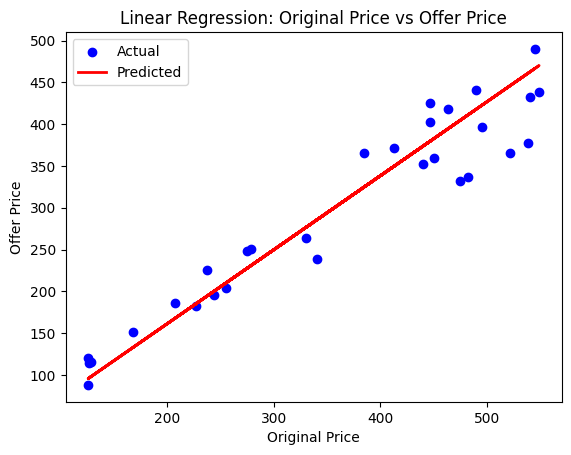

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df2[["originalprice"]]
y = df2["offerprice"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted")
plt.xlabel("Original Price")
plt.ylabel("Offer Price")
plt.title("Linear Regression: Original Price vs Offer Price")
plt.legend()
plt.show()

Random Forest Mean Squared Error: 109.39107999999996
Random Forest R2 Score: 0.9918113373236427


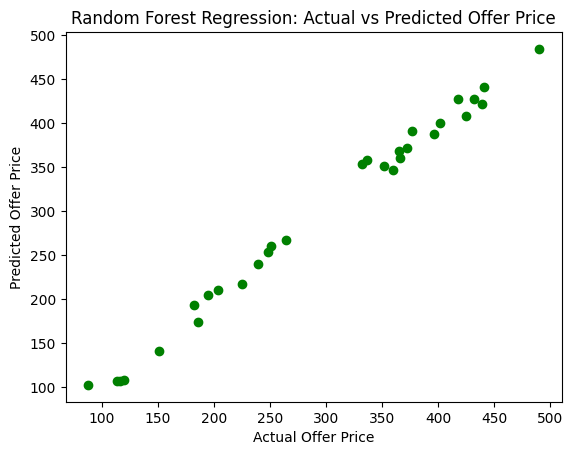

In [51]:
from sklearn.ensemble import RandomForestRegressor

X = df2[["originalprice", "discount"]]
y = df2["offerprice"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R2 Score: {r2_rf}")


plt.scatter(y_test, y_pred_rf, color="green")
plt.xlabel("Actual Offer Price")
plt.ylabel("Predicted Offer Price")
plt.title("Random Forest Regression: Actual vs Predicted Offer Price")
plt.show()

K-Mean clustering for grouping products based on discount range 

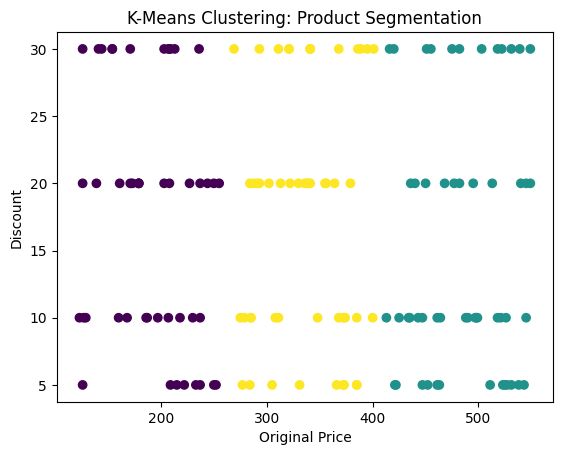

In [54]:
from sklearn.cluster import KMeans


X_cluster = df2[["originalprice", "discount"]]

kmeans = KMeans(n_clusters=3, random_state=42)
df2["Cluster"] = kmeans.fit_predict(X_cluster)


plt.scatter(df2["originalprice"], df2["discount"], c=df2["Cluster"], cmap="viridis")
plt.xlabel("Original Price")
plt.ylabel("Discount")
plt.title("K-Means Clustering: Product Segmentation")
plt.show()

In [55]:
centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
print(centroids)

Cluster Centroids:
[[191.70212766  17.44680851]
 [485.35849057  15.37735849]
 [335.52        17.5       ]]


In [56]:
cluster_summary = df2.groupby("Cluster")[["originalprice", "discount"]].mean()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
         originalprice   discount
Cluster                          
0           191.702128  17.446809
1           485.358491  15.377358
2           335.520000  17.500000


In [57]:
cluster_counts = df2["Cluster"].value_counts()
print("Number of Data Points in Each Cluster:")
print(cluster_counts)

Number of Data Points in Each Cluster:
Cluster
1    53
2    50
0    47
Name: count, dtype: int64


Support Vector Machines (SVM) for Classification Objective to Classify the sentiment of the Reviews


In [59]:
import pandas as pd
from textblob import TextBlob


def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity


df2["Sentiment"] = df1["reviews"].apply(get_sentiment)
df2.to_csv("labeled_dataset2.csv", index=False)

In [60]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


data = pd.read_csv("labeled_dataset2.csv")


print(data["Sentiment"].unique())


def categorize_sentiment(value):
    if value <= 0.4:
        return "negative"
    elif value <= 0.6:
        return "neutral"
    else:
        return "positive"


data["Sentiment"] = data["Sentiment"].apply(categorize_sentiment)


X = data["reviews"]
y = data["Sentiment"]


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

[0.5        0.75       0.         0.4625     0.16666667 1.
 0.1        0.455     ]
Accuracy: 0.4666666666666667
              precision    recall  f1-score   support

    negative       0.20      0.20      0.20         5
     neutral       0.52      0.81      0.63        16
    positive       0.00      0.00      0.00         9

    accuracy                           0.47        30
   macro avg       0.24      0.34      0.28        30
weighted avg       0.31      0.47      0.37        30



C:\Users\Riya\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Riya\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Riya\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Accuracy: 0.4666666666666667
              precision    recall  f1-score   support

    negative       0.25      0.40      0.31         5
     neutral       0.55      0.75      0.63        16
    positive       0.00      0.00      0.00         9

    accuracy                           0.47        30
   macro avg       0.27      0.38      0.31        30
weighted avg       0.33      0.47      0.39        30



C:\Users\Riya\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Riya\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Riya\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

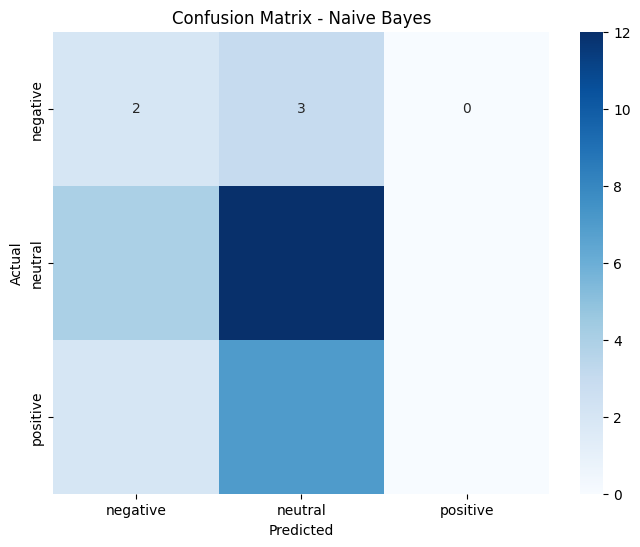

In [61]:
from sklearn.naive_bayes import MultinomialNB


X = data["reviews"]
y = data["Sentiment"]


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


y_pred = nb_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred, labels=nb_model.classes_)


plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=nb_model.classes_,
    yticklabels=nb_model.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

Price Prediction
The Random Forest model has a much lower MSE compared to Linear Regression, Means that its predictions are closer to the actual offerprice values on average.
R² Score: The Random Forest model has a higher R² score, showing that it explains a higher proportion of the variance in offerprice compared to Linear Regression. This means Random Forest is better at capturing the complex relationships between originalprice, discount, and offerprice.
Conclusion:
The Random Forest model performs significantly better for price prediction compared to Linear Regression. 

Sentiment Analysis in Review
Naive Bayes:
Accuracy: 0.47
Precision/Recall/F1-score:
Negative: Precision: 0.20, Recall: 0.20, F1: 0.20
Neutral: Precision: 0.52, Recall: 0.81, F1: 0.63
Positive: Precision: 0.00, Recall: 0.00, F1: 0.00
SVM:
Accuracy: 0.47
Precision/Recall/F1-score:
Negative: Precision: 0.25, Recall: 0.40, F1: 0.31
Neutral: Precision: 0.55, Recall: 0.75, F1: 0.63
Positive: Precision: 0.00, Recall: 0.00, F1: 0.00
 Both Naive Bayes and SVM models have the same accuracy of 0.47, that  means both model is particularly effective at distinguishing between the sentiment classes in this dataset.
Precision/Recall/F1-score:
Naive Bayes performs better for neutral sentiment with relatively higher recall, but performs poorly for positive sentiment.
SVM shows slightly better performance for the negative and neutral classes but also not that effective with positive sentiment.

Based on the results for both websites ,linear regression model is working good for price prediction , whereas for sentiment analysis the svm and naiebase algorithm is working best for tira website with accuracy of 1.00 but on the otherhand it is not giving effective results for positive sentiment in respect to other website , as the sentiments are not purely positive , so the output is neutral.